# Логистическая регрессия (Logistic Regression)

---

**Источники:**


[UNDERSTANDING MULTI-DIMENSIONAL LINEAR REGRESSION, CLOSED FORM](https://www.easymachinelearning.net/introml/understanding-multi-dimensional-linear-regression-and-polynomial-regression/)

[Классическое машинное обучение: задачи классификации, обобщения, кластеризации данных](https://evergreens.com.ua/ru/articles/classical-machine-learning.html)

[Множественная линейная регрессия (Multiple Linear Regression)](https://wiki.loginom.ru/articles/multiple-linear-regression.html)

---

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [ ]:
import numpy as np

np.__version__

In [ ]:
import pandas as pd

pd.__version__

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

In [ ]:
import seaborn as sns

sns.__version__

In [ ]:
import sklearn

sklearn.__version__

## Загрузка данных

[Источник (Telco Customer Churn)](https://www.kaggle.com/blastchar/telco-customer-churn).

In [ ]:
df = pd.read_csv('./../../data/Telco-Customer-Churn.csv', index_col='customerID')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

In [ ]:
df[df == ' '].count()

In [ ]:
df.TotalCharges.replace(' ', np.nan, inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df.TotalCharges = df.TotalCharges.astype('float')

## Вероятность (Probability)

TODO

## Различия между Линейной (Linear) и Логистической (Logistic) регрессией (Regression)


<img src="images/linear_vs_logistic_regression_2.png" width="600">


В то время как **линейная регрессия** подходит для оценки **непрерывных значений** (например, оценок цены дома), это не лучший инструмент для прогнозирования класса, то есть **дискретных значений**.

Чтобы **оценить класс**, нужно какое-то руководство в том, какой класс будет наиболее вероятным для этого набора признаков. Для этого можно использовать **логистическую регрессию**.

**Логистическая регрессия** - это **разновидность линейной регрессии**, полезная, когда наблюдаемая зависимая переменная $y$ является категориальной. 

**Логистическая регрессия** соответствует специальной s-образной кривой, взяв линейную регрессию и преобразовав числовую оценку в вероятность с помощью следующей функции, которая называется сигмоидной функцией $\sigma$:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Или:
$$
Probability\space of \space Class_1 =  P(y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

В этом уравнении ${\theta^TX}$ - это результат регрессии (сумма переменных, взвешенных коэффициентами), `exp` - экспоненциальная функция, а $\sigma(\theta^TX)$ - сигмоида или [логистическая функция](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5), также называется логистической кривой. Это обычная S-образная форма (сигмовидная кривая).

<img src="images/linear_vs_logistic_regression_1.png" width="600">


Итак, вкратце, логистическая регрессия передает входные данные через логистическую / сигмоиду, но затем обрабатывает результат как вероятность:

<img src="images/log_regr_prob.png" width="400">

Цель алгоритма **логистической регрессии** - найти наилучшие параметры $\theta$ для $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$ таким образом, чтобы наилучшим образом предсказать класс каждого случая.


## Предварительная обработка (pre-processing) и выбор (selection) данных

In [3]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')
df.head()

<ipython-input-3-6221f1cbf25a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn'] = df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [4]:
df.shape

(200, 10)

In [5]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [6]:
y = np.asarray(df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

normalize the dataset:

In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Обучение модели (Train)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


### Параметры `sklearn.linear_model.LogisticRegression`

`class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)`

- `penalty: {"l1", "l2", "elasticnet", "none"}, default="l2"`
    - Используется для указания нормы, применяемой при наложении штрафов.
    - Решатели (`solvers`) `newton-cg`, `sag` и `lbfgs` поддерживают только 12 штрафов.
    - `elasticnet` поддерживается только решателем `saga`.
    - Если "none" (не поддерживается `liblinear` решателем), регуляризация не применяется.
    - В версии 0.19: штраф l1 с решателем SAGA (допускающий "multinomial" + L1)
    
- `dual: bool, default=False`
    - Двойное (`dual`) или основное (`primal`) представление (`formulation`).
    - Двойное представление реализовано только для штрафа `l2` с `liblinear` решателем.
    - Рекомендуется использовать `dual = False`, когда `n_samples > n_features`.
    
- `tol: float, default=1e-4`
    - Допуск для критериев остановки.
    
- **`C: float, default=1.0`**
    - Обратное значение силы регуляризации.
    - Должно быть положительным числом с плавающей запятой (`float` > 0).
    - Как и в [методе опорных векторов (support vector machines)](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2), меньшие значения указывают на более сильную регуляризацию.
    
    
- `fit_intercept: bool, default=True`
    - Указывает, следует ли добавить константу (также известную как смещение (bias) или пересечение (intercept)) к функции принятия решения.
    
    
- `intercept_scaling: float, default=1`
    - Полезно, только если используется решатель `liblinear` и для `self.fit_intercept=True`. В этом случае x становится [x, self.intercept_scaling], т.е. синтетический (synthetic) признак с постоянным значением, равным `intercept_scaling`, добавляется к вектору экземпляра (instance vector).
    - Пересечение становится равным `intercept_scaling * Synthetic_feature_weight.
    - ВНИМАНИЕ! Синтетический вес признака подлежит регуляризации `l1/l2`, как и все другие признаки. Чтобы уменьшить влияние регуляризации на вес синтетических признаков (и, следовательно, на пересечение), необходимо увеличить `intercept_scaling`.
    
    
- `class_weight: dict или "balanced", default=None`
    - Веса, связанные с классами в форме `{class_label: weight}`.
    - Если не указано иное, все классы должны иметь вес один.
    - "balanced" режим использует значения `y` для автоматической регулировки весов, обратно пропорциональных частотам классов во входных данных как `n_samples / (n_classes * np.bincount (y))`.
    - ВНИМАНИЕ! Эти веса будут умножены на `sample_weight` (переданный через метод `fit`), если указан `sample_weight`.
    
    
- `random_state: int, RandomState instance, default=None`
    - Используется, когда `solver` == `"sag"`, `"saga"` или `"liblinear"` для перемешивания данных.

- **`solver{"newton-cg", "lbfgs", "liblinear", "sag", "saga"}, default="lbfgs"`**
    - Алгоритм для использования в задаче оптимизации.
    - Для небольших наборов данных `"liblinear"` - хороший выбор, тогда как `"sag"` и `"saga"` быстрее для больших.
    - Для мультиклассовых задач только `"newton-cg"`, `"sag"`, `"saga"` и `"lbfgs"` обрабатывают полиномиальные потери (multinomial loss). `"liblinear"` ограничивается схемами "один против остальных" (one-versus-rest).
    - Значения `"Newton-cg"`, `"lbfgs"`, `"sag"` и `"saga"` используют L2 или без штрафа.
    - `"liblinear"` и `"saga"` используют штраф L1.
    - `"Saga"` также поддерживает штраф `elasticnet`.
    - `"Liblinear"` не поддерживает установку `penalty="none"`
    
- `verbose: int, default=0`
    - Для решателей `liblinear` и `lbfgs` можно установить `verbose` на любое положительное число для подробности.
    
- `warm_start: bool, default=False`
    - Если установлено значение `True`, повторно используется решение предыдущего вызова `fit` в качестве инициализации, в противном случае просто удаляется предыдущее решение.
    - Бесполезен для `либлинеарного` решателя.
    
- `n_jobs: int, default=None`
    - Количество ядер ЦП, используемых при распараллеливании классов, если `multi_class = "ovr"`.
    - Этот параметр игнорируется, если решатель установлен на `"liblinear"`, независимо от того, указан ли `multi_class` или нет.
    - `None` означает `1`, если только в контексте `joblib.parallel_backend`.
    - `-1` означает использование всех процессоров.
    
- `l1_ratio: float, default=None`
    - Параметр Elastic-Net mixing с `0 <= l1_ratio <= 1`.
    - Используется только если `penalty='elasticnet'`.
    - Установка `l1_ratio=0` эквивалентна использованию `penalty='l2'`.
    - Установка `l1_ratio=1` эквивалентна использованию `penalty='l1'`
    - Для `0 < l1_ratio < 1` штраф представляет собой комбинацию L1 и L2.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [10]:
y_predicted = LR.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [11]:
y_predicted_prob = LR.predict_proba(X_test)
y_predicted_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

## Оценка качества модели (Evaluation)

###  Матрица ошибок (confusion matrix)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix_(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_predicted, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


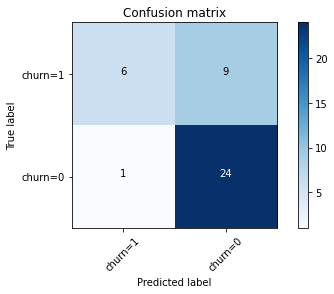

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix_(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

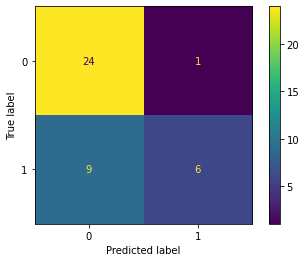

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test)  
plt.show()  

In [14]:
print (classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Based on the count of each section, we can calculate precision and recall of each label:

-   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

-   **Recall** is true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifier has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.


### log loss

Now, lets try **log loss** for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [15]:
from sklearn.metrics import log_loss
log_loss(y_test, y_predicted_prob)

0.6017092478101185

In [16]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
y_predicted_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, y_predicted_prob2))

LogLoss: : 0.61
